In [1]:
from wordcloud import WordCloud
from collections import Counter
import itertools
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

In [2]:
file_path = '/content/Comments_cleaned_only_sw.csv'
df = pd.read_csv(file_path)

df.head()

,id,videoId,textOriginal,authorDisplayName,likeCount,publishedAt,category_id,category_description,Tokens,Tokens_without_stopwords
0,Ugz0QmXyVLSM0nUK7kB4AaABAg,cQ9RLDhq6JY,me gusta su episodio pero solo he escuchado lo...,@fabianbecerra2272,0,2024-07-15T12:41:43Z,1,Quejas o sugerencias de mejora,"['me', 'gusta', 'su', 'episodio', 'pero', 'sol...","['episodio', 'escuchado', 'youtube', 'spotify'..."
1,UgyJhRBhVcbyStZdxjR4AaABAg,cQ9RLDhq6JY,weeeeey,@SantiagoItzcoatl,0,2024-05-26T21:41:04Z,7,Comentarios generales,['weeeeey'],[]
2,UgzT1q2am7kMEM5ckDp4AaABAg,cQ9RLDhq6JY,les voy a enviar una foto de tarapaca,@Sonyeke_1,0,2024-05-23T22:06:21Z,7,Comentarios generales,"['les', 'voy', 'a', 'enviar', 'una', 'foto', '...","['foto', 'tarapaca']"
3,Ugyckucg38lqZFdZhaR4AaABAg,cQ9RLDhq6JY,entonces teca esta solterooooooooooooooo woooooo,@alejandranavarro464,0,2024-05-05T09:24:57Z,6,Comentarios humorísticos o memes,"['entonces', 'teca', 'esta', 'solteroooooooooo...",['teca']
4,UgzhZHVt-tEbDpbCvtB4AaABAg,cQ9RLDhq6JY,me encantan sus episodio los escucho en spotif...,@fiorellamartinez873,0,2024-04-21T21:09:08Z,5,Felicitaciones y agradecimientos,"['me', 'encantan', 'sus', 'episodio', 'los', '...","['encantan', 'episodio', 'spotify', 'viajo', '..."


In [3]:
nltk.download('punkt', quiet=True)

True

In [4]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

df['month_year'] = df['publishedAt'].dt.to_period('M')

<ipython-input-4-57aa6631a7a9>:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month_year'] = df['publishedAt'].dt.to_period('M')


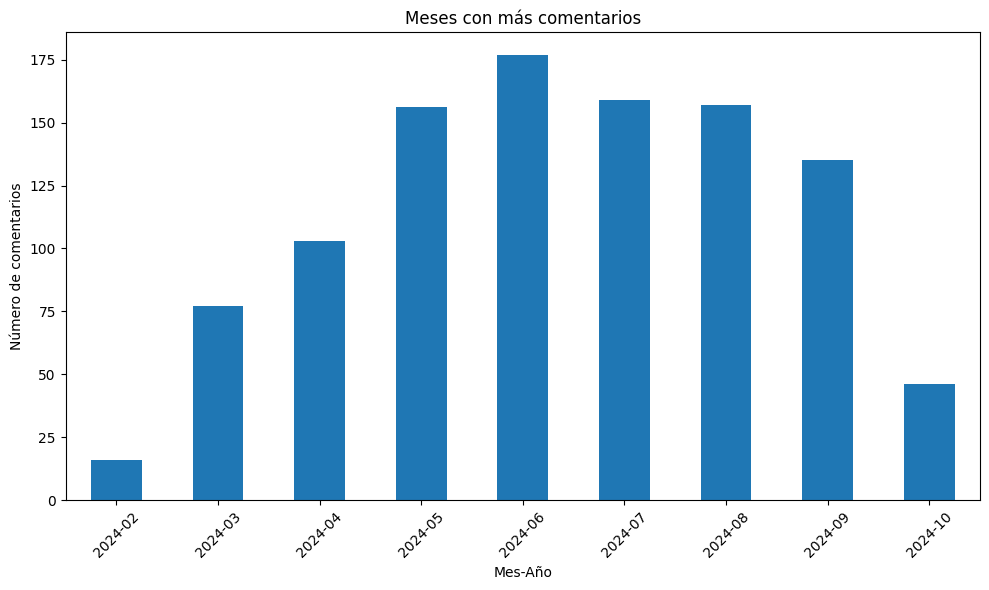

In [5]:
monthly_comments = df['month_year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))

monthly_comments.plot(kind='bar')

plt.title('Meses con más comentarios')
plt.xlabel('Mes-Año')
plt.ylabel('Número de comentarios')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

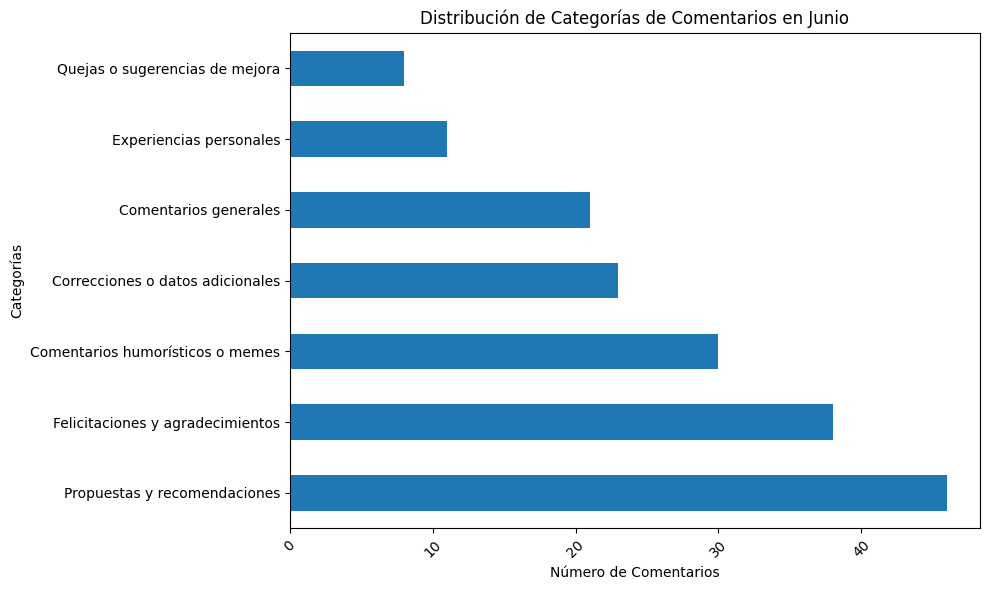

In [19]:
june_comments = df[df['publishedAt'].dt.month == 6]

june_category_distribution = june_comments['category_description'].value_counts()

plt.figure(figsize=(10, 6))

june_category_distribution.plot(kind='barh')

plt.title('Distribución de Categorías de Comentarios en Junio')
plt.ylabel('Categorías')
plt.xlabel('Número de Comentarios')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

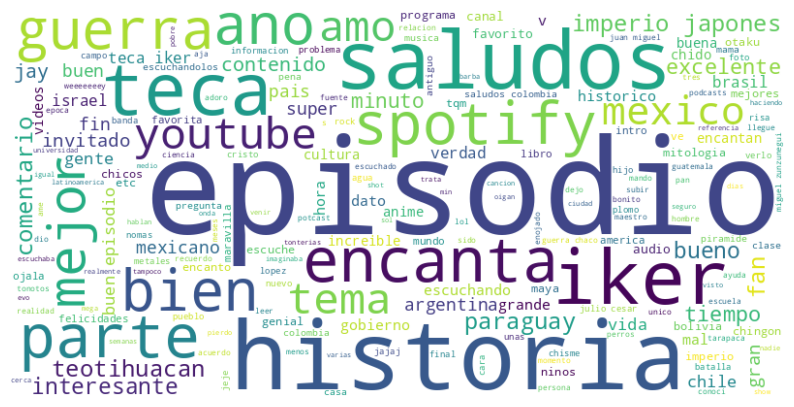

In [24]:
all_tokens = list(itertools.chain(*df['Tokens_without_stopwords'].dropna().apply(eval)))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_tokens))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

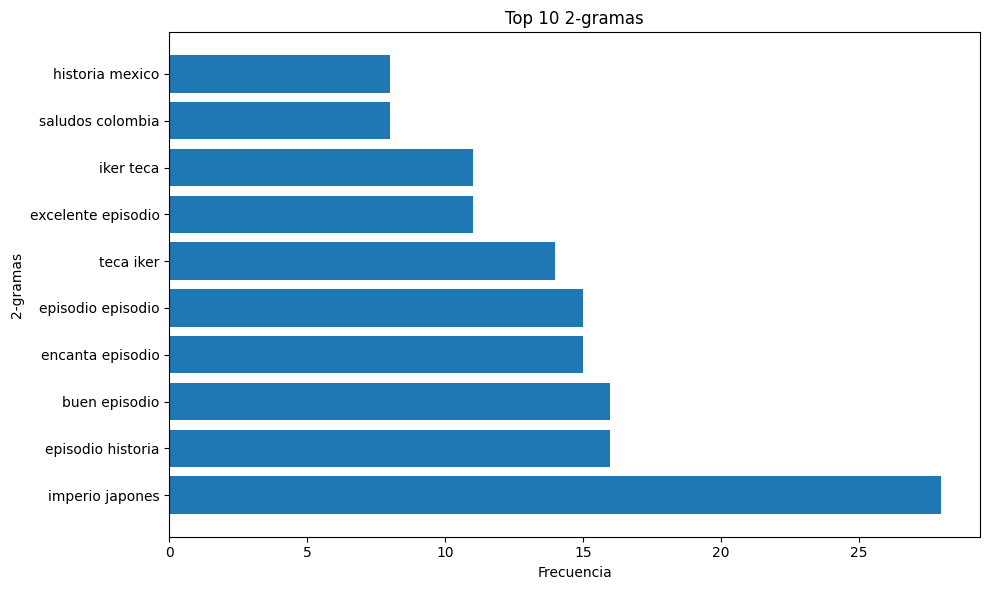

In [7]:
from nltk.util import ngrams

n = 2

ngrams_list = list(itertools.chain(*[list(ngrams(eval(tokens), n)) for tokens in df['Tokens_without_stopwords'].dropna()]))

ngram_counts = Counter(ngrams_list).most_common(10)
ngram_labels, ngram_values = zip(*ngram_counts)

plt.figure(figsize=(10, 6))
plt.barh([' '.join(ngram) for ngram in ngram_labels], ngram_values)
plt.title(f'Top 10 {n}-gramas')
plt.xlabel('Frecuencia')
plt.ylabel(f'{n}-gramas')
plt.tight_layout()

plt.show()


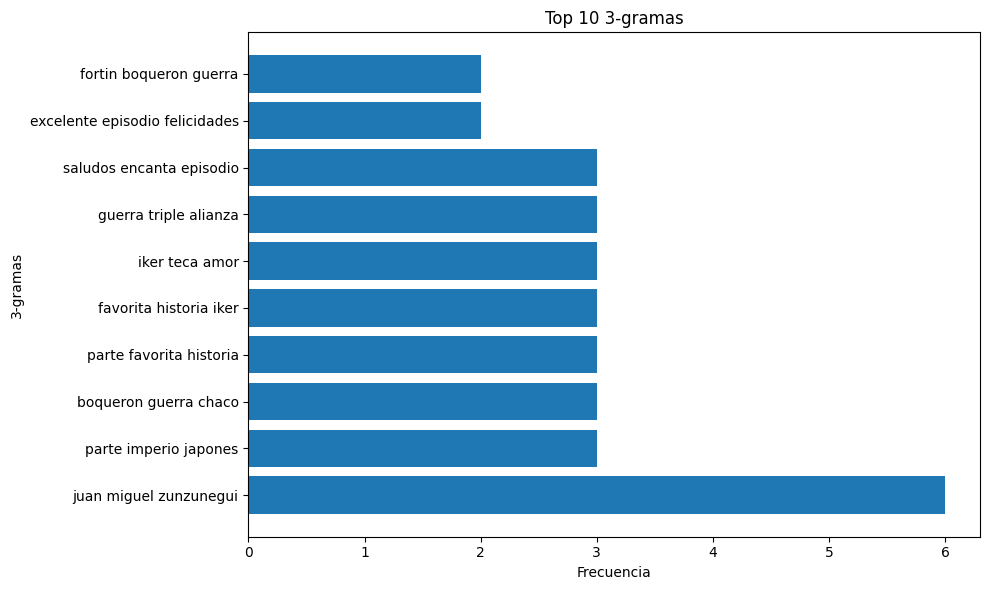

In [8]:
from nltk.util import ngrams

n = 3

ngrams_list = list(itertools.chain(*[list(ngrams(eval(tokens), n)) for tokens in df['Tokens_without_stopwords'].dropna()]))

ngram_counts = Counter(ngrams_list).most_common(10)
ngram_labels, ngram_values = zip(*ngram_counts)

plt.figure(figsize=(10, 6))
plt.barh([' '.join(ngram) for ngram in ngram_labels], ngram_values)
plt.title(f'Top 10 {n}-gramas')
plt.xlabel('Frecuencia')
plt.ylabel(f'{n}-gramas')
plt.tight_layout()

plt.show()


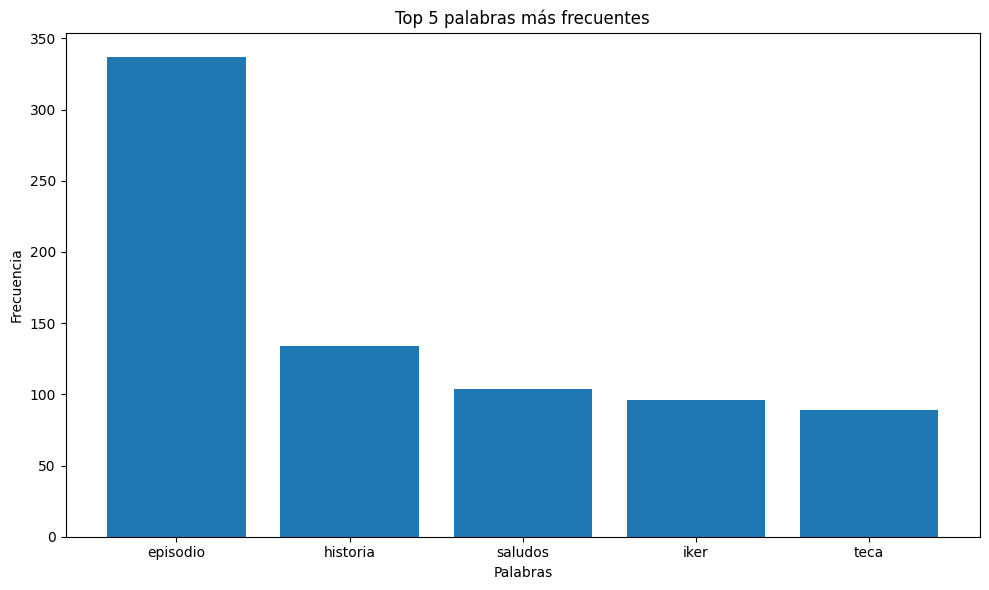

In [9]:
word_counts = Counter(all_tokens).most_common(5)
word_labels, word_values = zip(*word_counts)

plt.figure(figsize=(10, 6))

plt.bar(word_labels, word_values)
plt.title('Top 5 palabras más frecuentes')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.tight_layout()

plt.show()

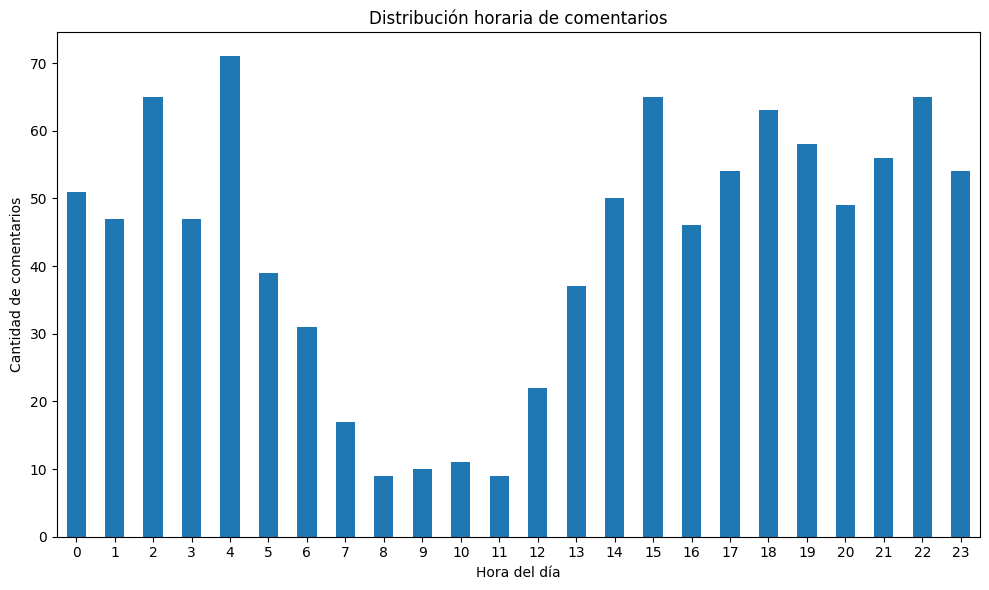

In [10]:
df['hour'] = df['publishedAt'].dt.hour

plt.figure(figsize=(10, 6))

df['hour'].value_counts().sort_index().plot(kind='bar')

plt.title('Distribución horaria de comentarios')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de comentarios')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

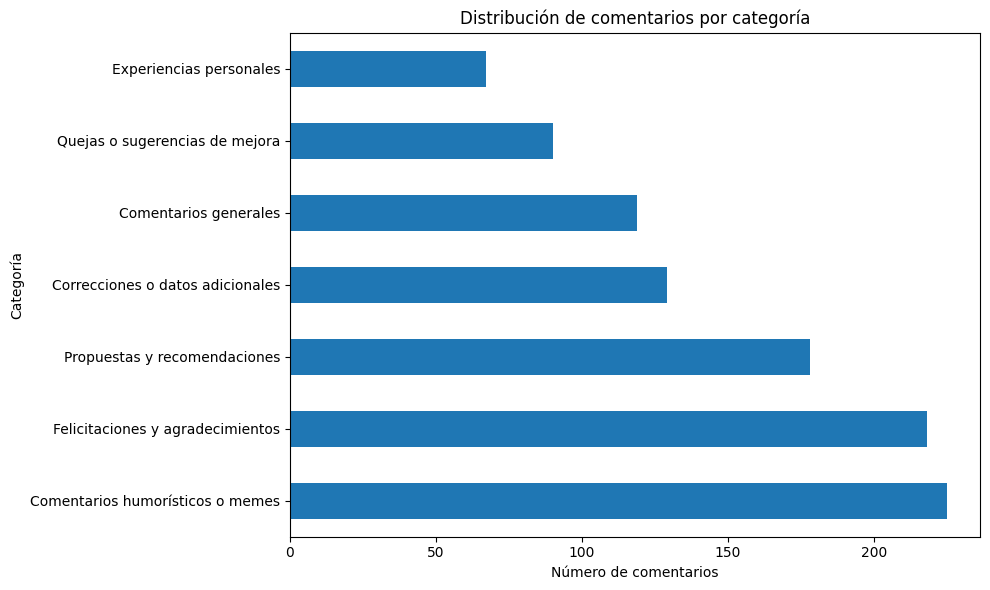

In [27]:
plt.figure(figsize=(10, 6))

df['category_description'].value_counts().plot(kind='barh')

plt.title('Distribución de comentarios por categoría')
plt.ylabel('Categoría')
plt.xlabel('Número de comentarios')
#plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

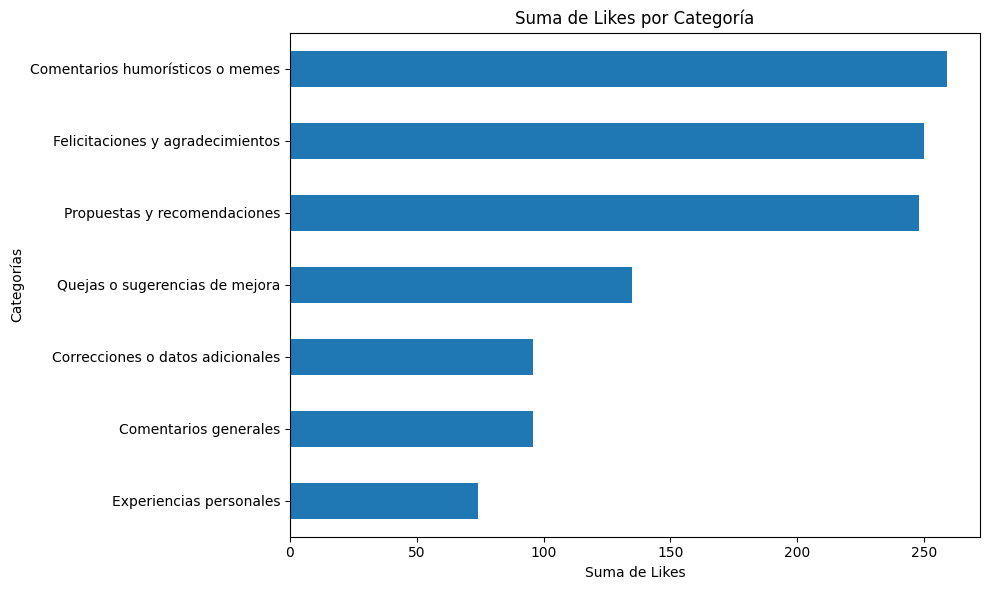

In [28]:
likes_per_category = df.groupby('category_description')['likeCount'].sum().sort_values()

plt.figure(figsize=(10, 6))

likes_per_category.plot(kind='barh')

plt.title('Suma de Likes por Categoría')
plt.xlabel('Suma de Likes')
plt.ylabel('Categorías')
#plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


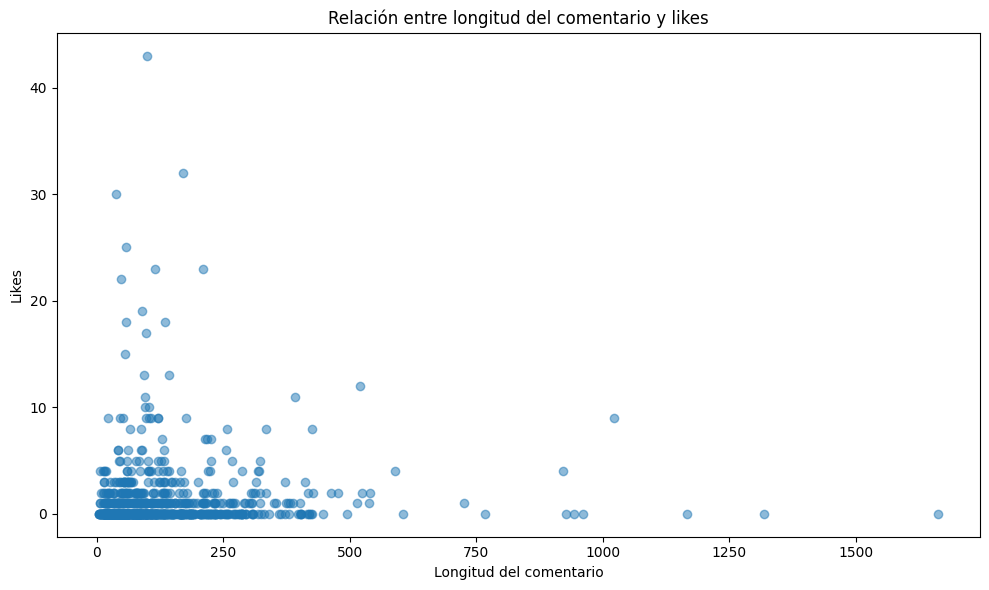

In [14]:
df['comment_length'] = df['textOriginal'].str.len()

plt.figure(figsize=(10, 6))
plt.scatter(df['comment_length'], df['likeCount'], alpha=0.5)
plt.title('Relación entre longitud del comentario y likes')
plt.xlabel('Longitud del comentario')
plt.ylabel('Likes')
plt.tight_layout()

plt.show()